# importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

setting pandas to display all columns (`optional`)

In [ ]:
pd.set_option('display.max_columns', None)

# loading the data

In [ ]:
df = pd.read_excel('data/Canada.xlsx', 
                   sheet_name=1,
                   skiprows=20, 
                   skipfooter=2)
df

# preprocessing the data
- optional steps
    - rename columns
    - drop non-essential columns
    - add new columns
    - check and change data types
    - check for missing values

rename columns according to the problem statement

In [ ]:
df = df.rename(columns={
    'OdName': 'country',
    'AreaName': 'continent',
    'RegName': 'region',
    'DevName': 'status',
}).copy()

drop non-essential columns

In [ ]:
df.columns

In [ ]:
cols_to_drop = ['Type', 'Coverage', 'AREA', 'REG', 'DEV']
df = df.drop(columns=cols_to_drop)

add columns - total

In [ ]:
years = list(range(1980, 2014))
df['total'] = df[years].sum(axis=1)
df.head()

check data type

In [ ]:
df.info()

check for missing data

if we have missing data in column it will be shown in the bar chart, 
if there is no missing data, the bar chart will be empty

In [ ]:
df.isnull().sum().plot(kind='bar', figsize=(10,1))
# if we have missing data in column it will be shown in the bar chart, 
# if there is no missing data, the bar chart will be empty

In [ ]:
df.country.tolist()

In [ ]:
df = df.replace('United Kingdom of Great Britain and Northern Ireland','UK',)

### create a function to load the data and preprocess it in one shot

In [ ]:
def load_data():
    # load the data
    df = pd.read_excel('data/Canada.xlsx', 
                   sheet_name=1,
                   skiprows=20, 
                   skipfooter=2)
    # rename the columns
    df = df.rename(columns={
        'OdName': 'country',
        'AreaName': 'continent',
        'RegName': 'region',
        'DevName': 'status',
    })
    # rename the values accordingly
    df = df.replace('United Kingdom of Great Britain and Northern Ireland','UK',)
    # drop unnecessary columns
    cols_to_drop = ['Type', 'Coverage', 'AREA', 'REG', 'DEV']
    df = df.drop(columns=cols_to_drop)
    # create a new column to display the total
    years = list(range(1980, 2014))
    df['total'] = df[years].sum(axis=1)
    return df # return the dataframe
    

In [ ]:
df = load_data()

Analysis and visualization

In [ ]:
df

sorting

In [ ]:
df = df.sort_values(by='total', ascending=False)

In [ ]:
df[['country','total']]

immigration pattern for the year 2000

In [ ]:
def immigration_pattern_for_year(year = 2010):
    return df[year].plot(
        kind='hist', 
        figsize=(10,5),
        bins = range(0, 35001, 1000), 
        xticks=range(0, 35001, 1000),
        rot=90)
    

immigration trend country wise

In [ ]:
def immigration_pattern_for_countries(size=100):
    return df[['country','total']].head(size).plot(
        kind='area',
        figsize=(20,5),
        x='country',
        y='total',
        rot=90,
        xticks=range(0, size),
    )

immigration trend year wise

In [ ]:
years = list(range(1980, 2014))
a = df[years].sum().plot(
    kind='line', 
    figsize=(10,5),
    xticks=range(0, 34),
    rot=90,
    color='#ff9933',
    marker='o', # `x, +, *, s, d, o, ., 1, 2, 3, 4, h, H, _`
    ms=5, # or markersize=5
    lw=10, # or linewidth=5
    alpha=0.5, # transparency
    linestyle='-', # or '--' or '-.' or ':'
    markerfacecolor='blue',
    markeredgecolor='yellow',
    title = 'Year wise trend'
)
a.text(20, 100000, 'We see upward trend in\nimmigration over the\nyears 1980-2013', 
       fontsize=12, color='gray',
       bbox=dict(facecolor='yellow', alpha=0.5, pad=10))

comparing countries immigration trend

In [ ]:
df.query('country == "France"')

`optional` - fixed the numeric index to country name

In [ ]:
df.set_index('country', inplace=True)
df.head()

In [ ]:
def country_wise_immigration(countries=['Japan','France']):
    ax = df.loc[countries][years].T.plot(
    figsize=(10,5),
    legend=False,
    marker='o', # `x, +, *, s, d, o, ., 1, 2, 3, 4, h, H, _`
    ms=10, # or markersize=5
    lw=5, # or linewidth=5
    alpha=0.3, # transparency
    linestyle='-', # or '--' or '-.' or ':'
    markerfacecolor='blue',
    markeredgecolor='yellow',
    title = " vs ".join(countries),
    )
    df.loc[countries][years].T.plot(kind='area', 
        ax=ax, 
        stacked=False,
        xticks=range(0, 34),
        rot=90
    )

In [ ]:
country_wise_immigration(['India','UK'])
country_wise_immigration(['India','China'])
country_wise_immigration(['India','Philippines'])


In [ ]:
df['continent'].value_counts()

In [ ]:
df['continent'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.1f%%')

In [ ]:
df['region'].value_counts().plot(kind='bar', figsize=(10,5),)

In [ ]:
df['status'].value_counts().plot(kind='pie', figsize=(5,5), autopct='%.1f%%')

In [ ]:
df.groupby('status')['total'].sum()

In [ ]:
df.groupby('status')['total'].std().plot(kind='pie', figsize=(5,5), autopct='%.1f%%')

In [ ]:
cdf= df.groupby('continent')[[1980,1990,2000,2010]].max()
cdf.T.plot(kind='line', figsize=(10,5),rot=90)

In [ ]:
cdf= df.groupby('continent')[years].sum()
cdf.T.plot(kind='area', figsize=(10,5),rot=90, stacked=False)

In [77]:
df.pivot_table(index='continent', columns='status', values='total', aggfunc='sum')

status,Developed regions,Developing regions
continent,,
Africa,NaN,618948.0
Asia,27707.0,3290087.0
Europe,1410947.0,NaN
Latin America and the Caribbean,NaN,765148.0
Northern America,241142.0,NaN
Oceania,34215.0,20959.0


array([<Axes: ylabel='Developed regions'>,
       <Axes: ylabel='Developing regions'>], dtype=object)

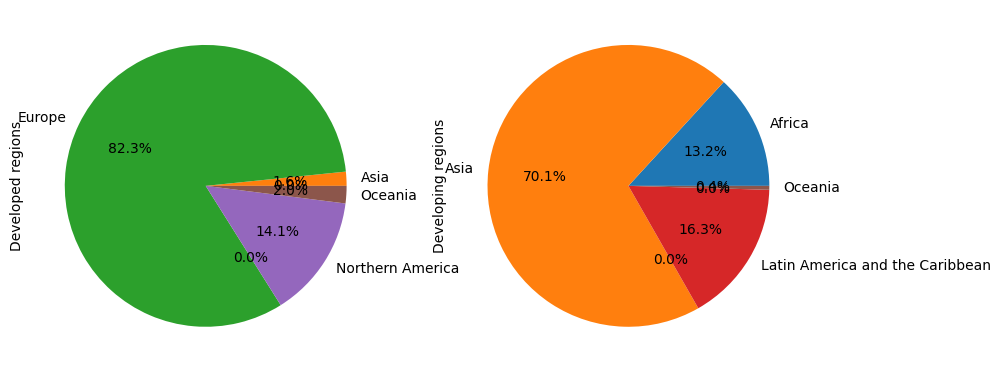

In [78]:
df.pivot_table(index='continent', 
            columns='status',
            values='total', 
            aggfunc='sum').plot(kind='pie', 
                                subplots=True, 
                                figsize=(10,5), 
                                autopct='%.1f%%', 
                                legend=False)
